In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_path = "../data/correct_cols.tsv"

In [3]:
def add_missing_tabs_in_file(source_path: str, target_path: str) -> None:
    with open(source_path, "r") as source, open(target_path, "w") as target:
        headers = "file\tyear\tid\tscore\tsen1\tsen2\tinfo1\tinfo2\n"
        target.write(headers)
        for line in source:
            if line.count("\t") == 5:
                line = line.strip()
                line += "\t\t\n"
            target.write(line)
add_missing_tabs_in_file("../data/sts-other.tsv", csv_path)

In [4]:
df = pd.read_csv(csv_path, sep="\t")

In [5]:
from utx.statistics.dataframes import summarise
print(summarise(df))

In [6]:
df["year"] = df.year.str.replace("test", "")
df = (df
      .astype({"file": "category", "year": "int16"})
      .drop("id", axis=1)
)

Summary statistics:
Dataframe dimensions: 3814x8
file - object
	Examples:
		surprise.OnWN
		surprise.OnWN
		surprise.OnWN
	Unique objects:
		7
	Contains NaN: False
year - object
	Examples:
		2012test
		2012test
		2012test
	Unique objects:
		5
	Contains NaN: False
id - int64
	Range( 0.00,  1981.00)
	Quantiles: 0.25:  161.00 | 0.5:  359.50 | 0.75:  574.00
	Mean:  419.43
	Contains NaN: False
score - float64
	Range( 0.00,  5.00)
	Quantiles: 0.25:  1.00 | 0.5:  3.20 | 0.75:  4.20
	Mean:  2.73
	Contains NaN: False
sen1 - object
	Examples:
		render one language in another language
		nations unified by shared interests, history or institutions
		convert into absorbable substances, (as if) with heat or chemical process
	Unique objects:
		3142
	Contains NaN: False
sen2 - object
	Examples:
		restate (words) from one language into another language.
		a group of nations having common interests.
		soften or disintegrate by means of chemical action, heat, or moisture.
	Unique objects:
		2936
	Contain

In [7]:
print(summarise(df))

In [8]:
from utx.statistics.arrays import stats1d
from utx.plot import plot
from scipy.stats import gaussian_kde

(plot(0, 5, 100)
 .function(gaussian_kde(df.score))
 .labels("Score Density Distribution", "Score", "Density")
 .show()
)

Summary statistics:
Dataframe dimensions: 3814x7
file - category
	Examples:
		surprise.OnWN
		surprise.OnWN
		surprise.OnWN
	Unique objects:
		7
	Contains NaN: False
year - int16
	Examples:
		2012
		2012
		2012
	Unique objects:
		5
	Contains NaN: False
score - float64
	Range( 0.00,  5.00)
	Quantiles: 0.25:  1.00 | 0.5:  3.20 | 0.75:  4.20
	Mean:  2.73
	Contains NaN: False
sen1 - object
	Examples:
		render one language in another language
		nations unified by shared interests, history or institutions
		convert into absorbable substances, (as if) with heat or chemical process
	Unique objects:
		3142
	Contains NaN: False
sen2 - object
	Examples:
		restate (words) from one language into another language.
		a group of nations having common interests.
		soften or disintegrate by means of chemical action, heat, or moisture.
	Unique objects:
		2936
	Contains NaN: False
info1 - object
	Examples:
		nan
		nan
		nan
	Unique objects:
		232
	Contains NaN: True
info2 - object
	Examples:
		nan
		nan
	

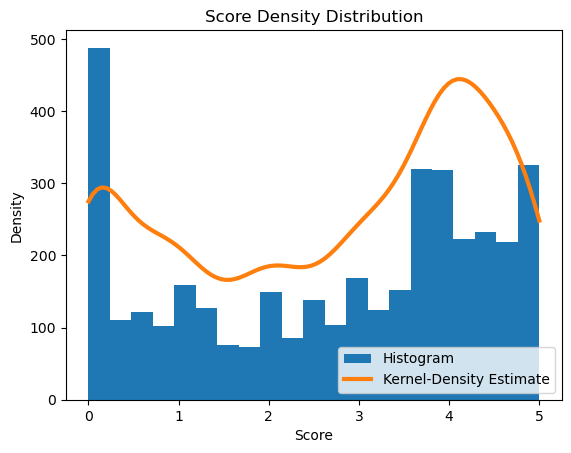

In [52]:
import matplotlib.pyplot as plt
plt.hist(df.score, bins=20)
plt.show()

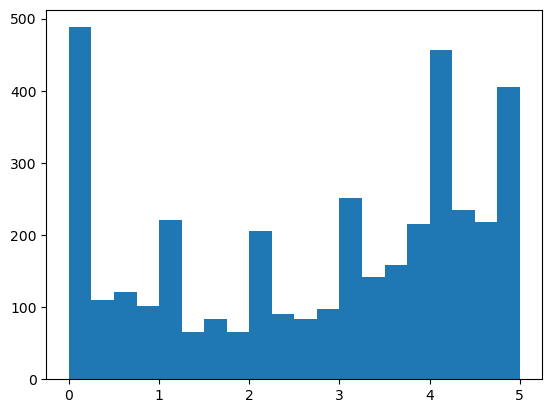